In [11]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


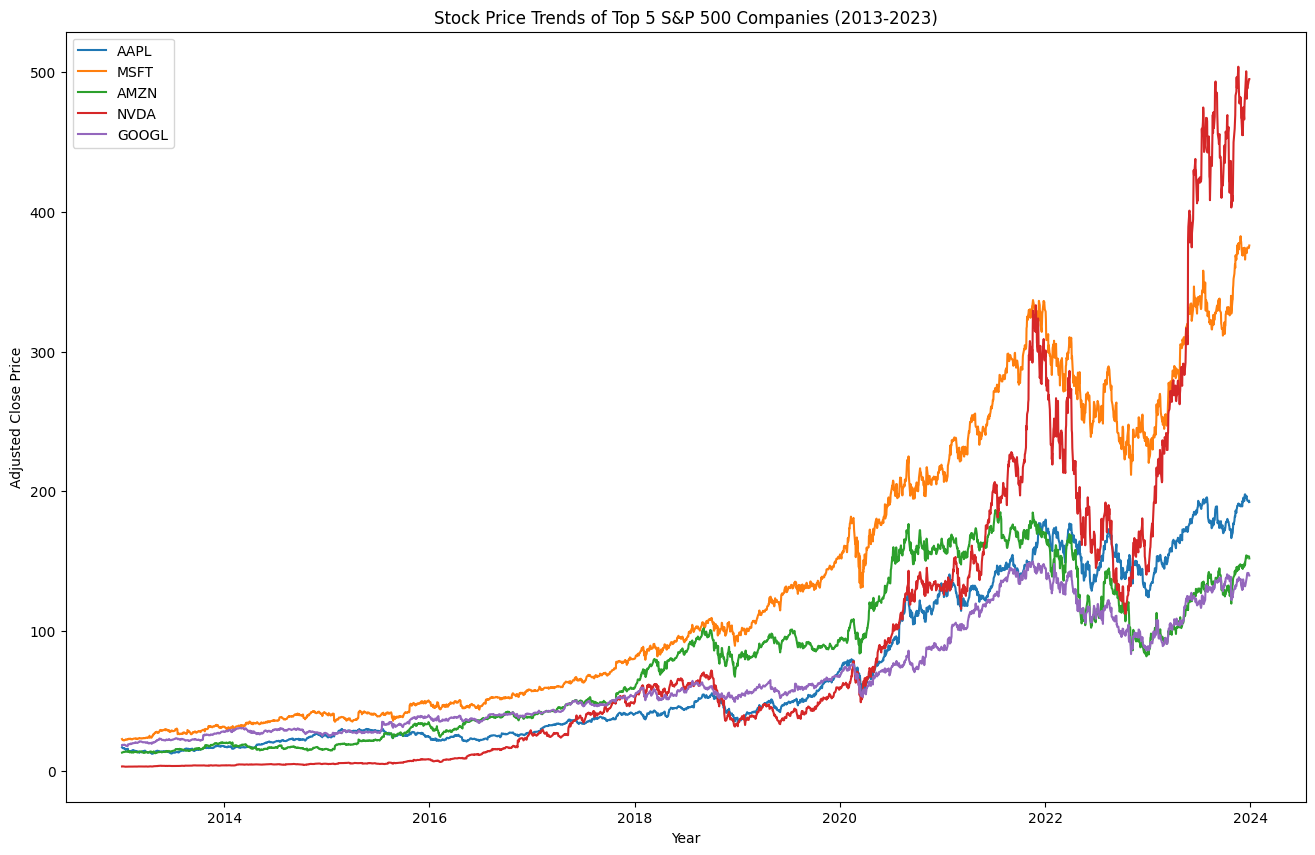

In [19]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL']

# Create an empty DataFrame to hold all the adjusted close prices
all_data = pd.DataFrame()

# Gather historical data for each company and add it to the DataFrame
for ticker in tickers:
    stock_data = yf.download(ticker, start='2013-01-01', end='2023-12-31')['Adj Close']
    all_data[ticker] = stock_data

# Plot the data
plt.figure(figsize=(16,10))
for ticker in tickers:
    plt.plot(all_data[ticker], label=ticker)

plt.title('Stock Price Trends of Top 5 S&P 500 Companies (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [5]:
# Calculate ROI for each company
roi = {}
for ticker in tickers:
    initial_price = all_data[ticker].iloc[0]  # First price in the dataset
    final_price = all_data[ticker].iloc[-1]   # Last price in the dataset
    roi[ticker] = ((final_price - initial_price) / initial_price) * 100

# Sort the ROIs to find the highest one
sorted_roi = sorted(roi.items(), key=lambda x: x[1], reverse=True)

# Print the sorted ROIs
for company, return_on_investment in sorted_roi:
    print(f"{company}: {return_on_investment:.2f}%")

# Identify the company with the highest ROI
company_with_highest_roi = sorted_roi[0][0]
roi_value = sorted_roi[0][1]
print(f"The company with the highest ROI is {company_with_highest_roi} with a return of {roi_value:.2f}%.")


NVDA: 16767.29%
MSFT: 1565.77%
AMZN: 1080.99%
AAPL: 1048.12%
GOOGL: 671.80%
The company with the highest ROI is NVDA with a return of 16767.29%.


Annual Volatility:
NVDA     0.446821
AMZN     0.326502
AAPL     0.283812
GOOGL    0.273865
MSFT     0.268613
dtype: float64


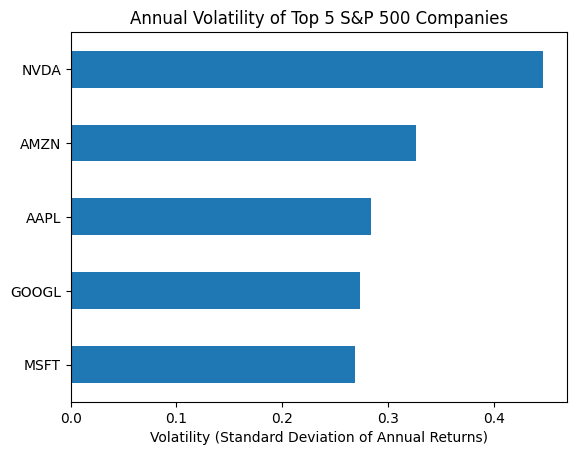

In [6]:
# Calculate daily returns for each stock
daily_returns = all_data.pct_change()

# Calculate the standard deviation of daily returns to get volatility
volatility = daily_returns.std()

# Multiply by the square root of the number of trading days to annualize
trading_days = 252
annual_volatility = volatility * (trading_days ** 0.5)

# Print the annual volatility for each company
print("Annual Volatility:")
print(annual_volatility.sort_values(ascending=False))

# Plot the annual volatility for comparison
annual_volatility.sort_values().plot(kind='barh', title='Annual Volatility of Top 5 S&P 500 Companies')
plt.xlabel('Volatility (Standard Deviation of Annual Returns)')
plt.show()


                ROI  Annual Volatility
AAPL    1048.123694           0.283812
MSFT    1565.772023           0.268613
AMZN    1080.987891           0.326502
NVDA   16767.288904           0.446821
GOOGL    671.795768           0.273865


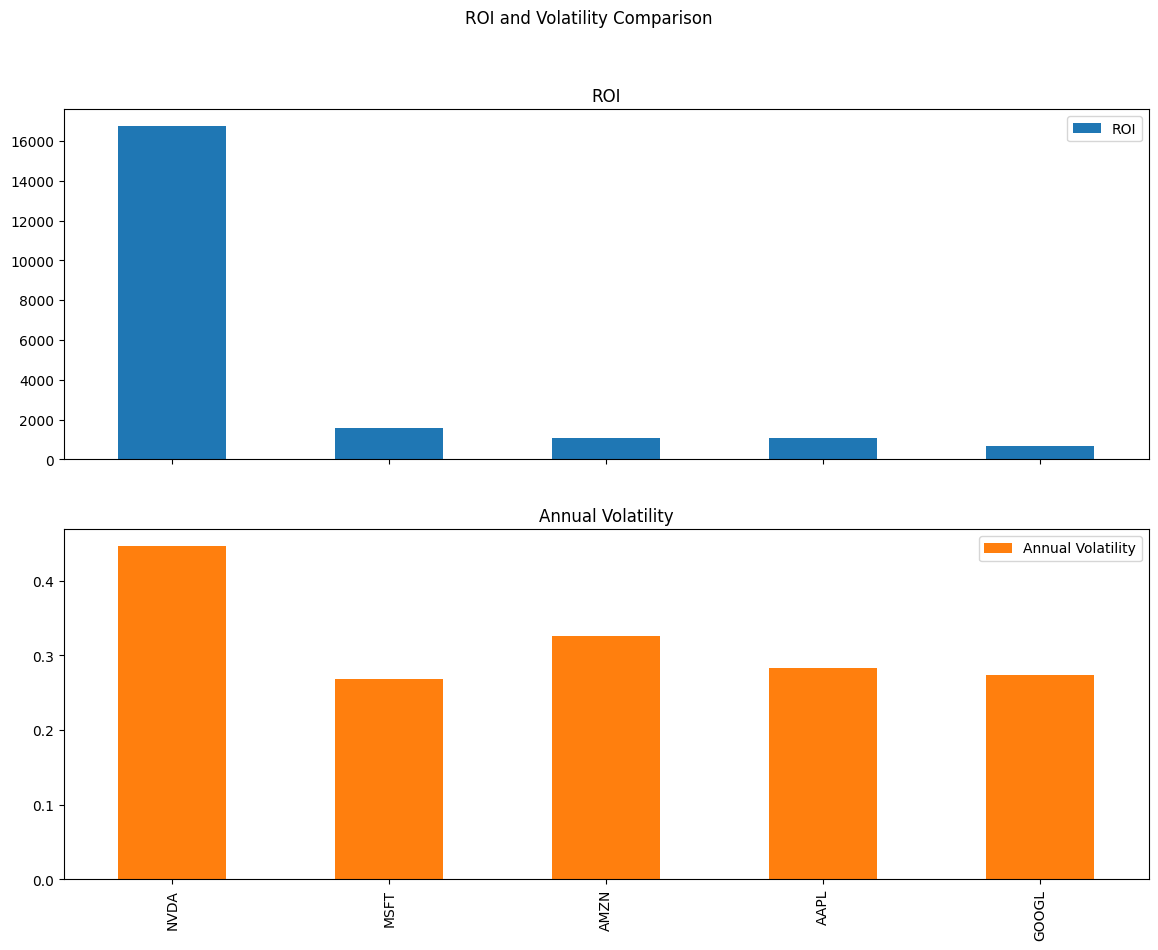

In [8]:

performance_comparison = pd.DataFrame({
    'ROI': roi,
    'Annual Volatility': annual_volatility
})

print(performance_comparison)

# Plotting the results for better visualization
performance_comparison.sort_values('ROI', ascending=False).plot(kind='bar', subplots=True, figsize=(14, 10), title='ROI and Volatility Comparison')
plt.show()


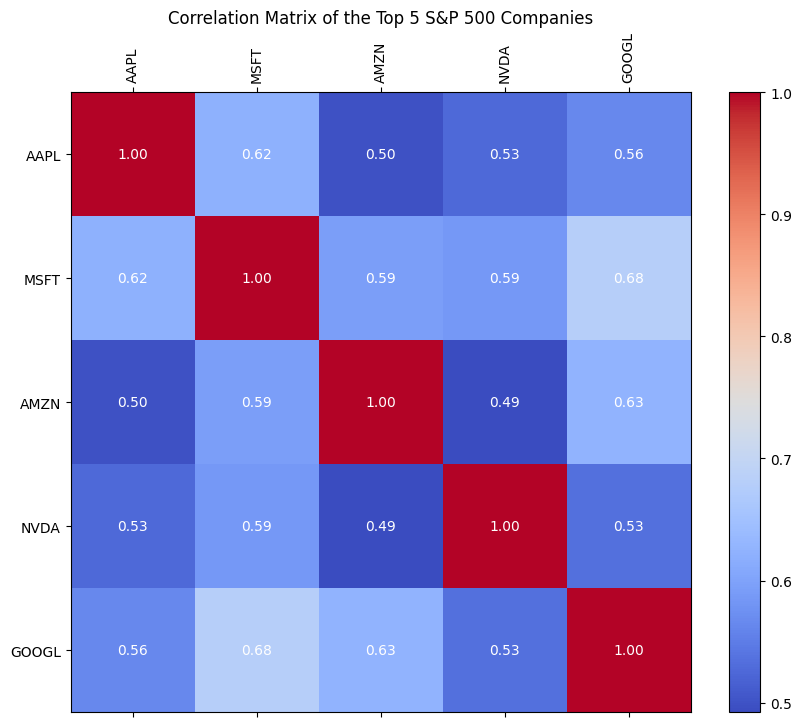

In [9]:
daily_returns = all_data.pct_change().dropna()

# Create a correlation matrix from the daily returns
correlation_matrix = daily_returns.corr()

# Use matshow to visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Loop over data dimensions and create text annotations.
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="w")

plt.title('Correlation Matrix of the Top 5 S&P 500 Companies')
plt.show()

c:\Users\khann\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\khann\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\khann\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\khann\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is availab

Test MSE: 684.617


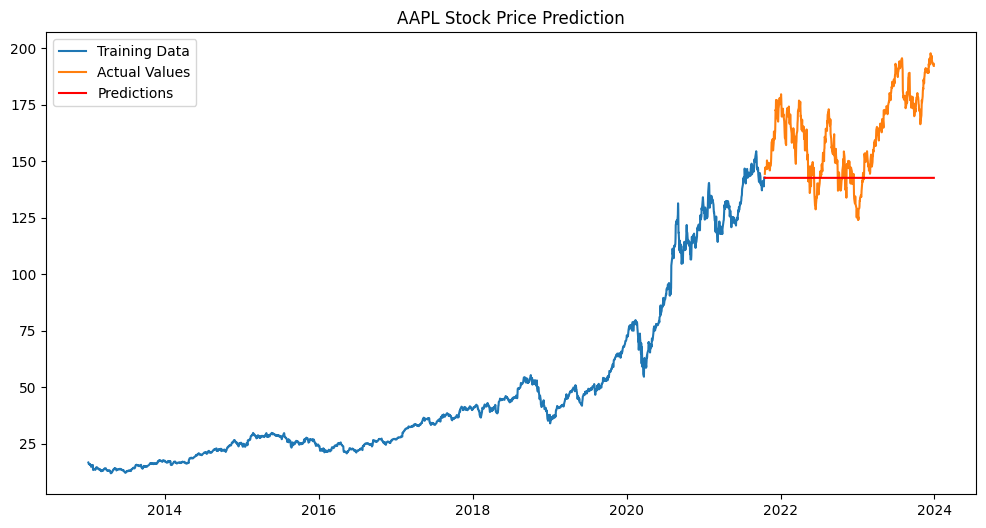

In [14]:
aapl_series = all_data['AAPL'].dropna()

# Split the data into train and test sets
train = aapl_series[:int(0.8 * len(aapl_series))]
test = aapl_series[int(0.8 * len(aapl_series)):]

# Fit an ARIMA model (you would need to optimize the order (p,d,q) parameters)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions.index = test.index  # Align the predictions with the test index

# Evaluate the model
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error:.3f}')

# Plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Values')
plt.plot(predictions, label='Predictions', color='red')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()
